## [02] Augmentation comparison


### rubric
1. CutMixÏôÄ MixUp Í∏∞Î≤ïÏùÑ ResNet50 Î∂ÑÎ•òÍ∏∞Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÅÏö©ÌïòÏòÄÎäîÍ∞Ä? CutMixÏôÄ MixUpÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌõàÎ†®Ìïú Í∞ÅÍ∞ÅÏùò ResNet Î™®Îç∏Ïù¥ ÏàòÎ†¥ÌïòÏòÄÎã§.

2. Îã§ÏñëÌïú Ïã§ÌóòÏùÑ ÌÜµÌï¥ ÌÉúÏä§ÌÅ¨Ïóê ÏµúÏ†ÅÏù∏ Augmentation Í∏∞Î≤ïÏùÑ Ï∞æÏïÑÎÇ¥ÏóàÎäîÍ∞Ä? Augmentation Ï†ÅÏö©ÏùÑ ÌÜµÌï¥ Augmentaion ÎØ∏Ï†ÅÏö©Ïãú ÎåÄÎπÑ 5% Ïù¥ÏÉÅÏùò ÏÑ±Îä•Ìñ•ÏÉÅÏùÑ ÌôïÏù∏Ìï®

3. Ïó¨Îü¨Í∞ÄÏßÄ Augmentation Í∏∞Î≤ïÏùÑ Ï†ÅÏö©Ìïú Í≤∞Í≥ºÎ•º Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÎπÑÍµêÎ∂ÑÏÑùÌïòÏòÄÎäîÍ∞Ä? Í∏∞Î≥∏ Augmentation, CutMix, MixUpÏù¥ Ï†ÅÏö©Îêú Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÏôÄ Ìï®Íªò Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÏòÄÎã§.

### Ïã§ÏäµÎ™©Ìëú

- AugmentationÏùÑ Î™®Îç∏ ÌïôÏäµÏóê Ï†ÅÏö©ÌïòÍ∏∞
- AugmentationÏùò Ï†ÅÏö©ÏùÑ ÌÜµÌïú ÌïôÏäµ Ìö®Í≥º ÌôïÏù∏ÌïòÍ∏∞
- ÏµúÏã† data augmentation Í∏∞Î≤ï Íµ¨ÌòÑ Î∞è ÌôúÏö©ÌïòÍ∏∞

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## part1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
# TensorFlow and tf.keras


import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print('=3')

=3


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Dataset

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True, # dict ÌòïÌÉúÍ∞Ä ÏïÑÎãå tuple ÌòïÌÉúÎ°ú Îç∞Ïù¥ÌÑ∞Î•º return 
    shuffle_files=True,
    with_info=True,
)
print('=3')

=3


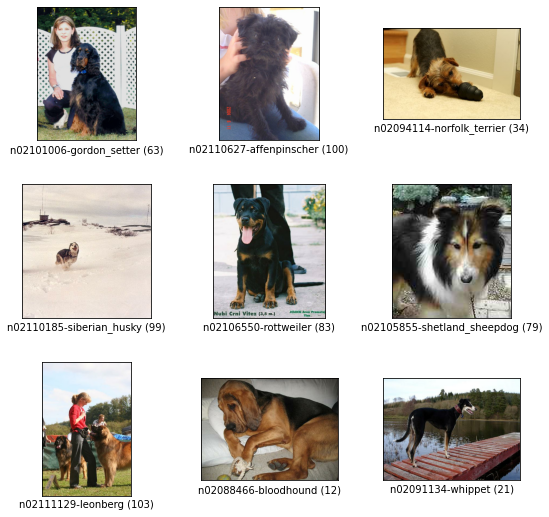

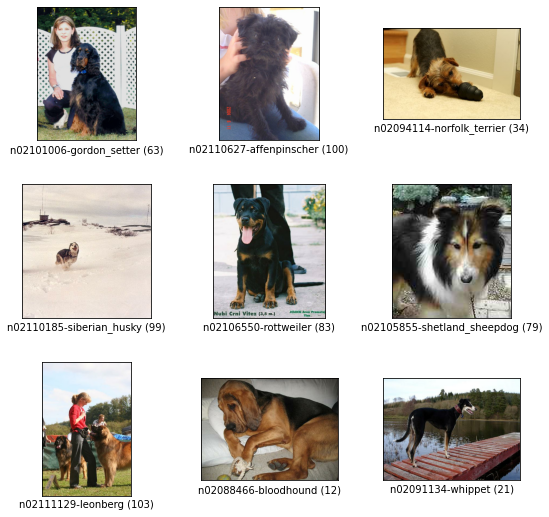

In [ ]:
tfds.show_examples(ds_train, ds_info)

## part2. Augmentation 

ÌÖêÏÑúÌîåÎ°úÏö∞ Random Augmentation API ÏÇ¨Ïö©ÌïòÍ∏∞
ÎßéÏùÄ augmentation Í∏∞Î≤ïÎì§Ïù¥ ÏûàÏßÄÎßå Í∑∏Ï§ëÏóêÏÑú ÌÖêÏÑúÌîåÎ°úÏö∞ APIÎ°ú Î∞îÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Î∞©Î≤ïÎì§ÏùÑ Î®ºÏ†Ä Ï†ÅÏö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§. Î®ºÏ†Ä Ïù¥ÎØ∏ÏßÄÏÖãÏóê ÎåÄÌï¥ÏÑú ÎûúÎç§Ìïú ÌôïÎ•†Î°ú Î∞îÎ°ú Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî augmentation Ìï®ÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

- random_brightness()
- random_contrast()
- random_crop()
- random_flip_left_right()
- random_flip_up_down()
- random_hue()
- random_jpeg_quality()
- random_saturation()

In [ ]:
# Ï†ÑÏ≤òÎ¶¨Ìï®Ïàò format

# def Ï†ÑÏ≤òÎ¶¨_Ìï®Ïàò(image, label):   # Î≥ÄÌôòÌï† Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®
    # Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôò Î°úÏßÅ Ï†ÅÏö©
    # new_image = Ïù¥ÎØ∏ÏßÄ_Î≥ÄÌôò(image)
    # return new_image, label

In [ ]:
# Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224]) # resize ÍπåÎ®πÏßÄ ÎßêÍ∏∞!
    return tf.cast(image, tf.float32) / 255., label

print('=3')

=3


In [ ]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image) # flip Ï¢åÏö∞ÎåÄÏπ≠ 
    image = tf.image.random_brightness(image, max_delta=0.2) # brightness Ï°∞Ï†à
    image = tf.clip_by_value(image, 0, 1)
    return image, label

print('=3')

=3


In [ ]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∞ÄÍ≥µÌïòÎäî Î©îÏù∏Ìï®Ïàò


def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ÅÏö©
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment,       # augment Ìï®Ïàò Ï†ÅÏö©
            num_parallel_calls=2
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

print('=3')

=3


In [ ]:
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)

### (1) Augmentation: Cutmix

1) Ïù¥ÎØ∏ÏßÄ ÏÑûÍ∏∞

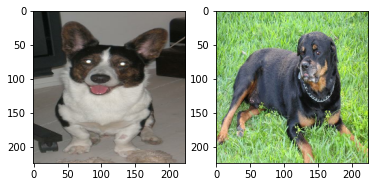

In [ ]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïù¥ÎØ∏ÏßÄ 2Í∞úÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()

In [ ]:
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0]
    
    # get center of box
    x = tf.cast(tf.random.uniform([], 0, image_size_x), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, image_size_y), tf.int32)

    # get width, height of box
    width = tf.cast(image_size_x*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    height = tf.cast(image_size_y*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    
    # clip box in image and get minmax bbox
    x_min = tf.math.maximum(0, x-width//2)
    y_min = tf.math.maximum(0, y-height//2)
    x_max = tf.math.minimum(image_size_x, x+width//2)
    y_max = tf.math.minimum(image_size_y, y+width//2)
    
    return x_min, y_min, x_max, y_max

x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)

print('x : ', x_min, x_max)
print('y : ', y_min, y_max)

x :  tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(85, shape=(), dtype=int32)
y :  tf.Tensor(62, shape=(), dtype=int32) tf.Tensor(195, shape=(), dtype=int32)


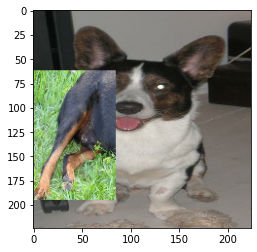

In [ ]:
# mix two images
def mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    middle_left = image_a[y_min:y_max, 0:x_min, :] # image_bÏùò ÏôºÏ™Ω Î∞îÍπ• ÏòÅÏó≠
    middle_center = image_b[y_min:y_max, x_min:x_max, :]  # image_bÏùò ÏïàÏ™Ω ÏòÅÏó≠
    middle_right = image_a[y_min:y_max, x_max:image_size_x, :] # image_bÏùò Ïò§Î•∏Ï™Ω Î∞îÍπ• ÏòÅÏó≠
    middle = tf.concat([middle_left,middle_center,middle_right], axis=1)
    top = image_a[0:y_min, :, :]
    bottom = image_a[y_max:image_size_y, :, :]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img

mixed_img = mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max)
plt.imshow(mixed_img.numpy())
plt.show()

2) ÎùºÎ≤® ÏÑûÍ∏∞

In [ ]:
# mix two labels
def mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max, num_classes=120):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    mixed_area = (x_max-x_min)*(y_max-y_min)
    total_area = image_size_x*image_size_y
    ratio = tf.cast(mixed_area/total_area, tf.float32)

    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_label = (1-ratio)*label_a + ratio*label_b
    return mixed_label

mixed_label = mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max)
mixed_label

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

In [ ]:
def cutmix(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max))
        mixed_labels.append(mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max))

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

print('=3')

=3


### (2) Augmentation: Mixup 

In [ ]:
num_classes = ds_info.features['label'].num_classes

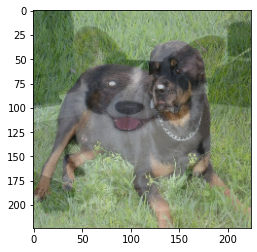

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.46779466
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [ ]:
# function for mixup
def mixup_2_images(image_a, image_b, label_a, label_b):
    ratio = tf.random.uniform([], 0, 1)
    
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_image= (1-ratio)*image_a + ratio*image_b
    mixed_label = (1-ratio)*label_a + ratio*label_b
    
    return mixed_image, mixed_label

mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
plt.imshow(mixed_img.numpy())
plt.show()
print(mixed_label)

In [ ]:
def mixup(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0,batch_size), tf.int32)
        image_b = image[j]
        label_b = label[j]
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

print('=3')

=3


In [ ]:
def onehot(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

In [ ]:
# augÎ•º Ï†ÅÏö©Ìï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÌôòÌïú apply_normalize_on_dataset() 
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False, with_cutmix=False, with_mixup=False):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment
        )
    ds = ds.batch(batch_size)
    if not is_test and with_cutmix:
        ds = ds.map(
            cutmix,
            num_parallel_calls=2
        )
    elif not is_test and with_mixup:
        ds = ds.map(
            mixup,
            num_parallel_calls=2
        )
    else:
        ds = ds.map(
            onehot,
            num_parallel_calls=2
        )
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

print('Ïäùüí®')

Ïäùüí®


## part3. model building

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)

ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_train_cutmix = apply_normalize_on_dataset(ds_train, with_cutmix=True)
ds_train_mixup = apply_normalize_on_dataset(ds_train, with_mixup=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)
print('Ïäùüí®')

Ïäùüí®


In [ ]:
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

94781440/94765736 [==============================] - 1s 0us/step
=3


In [ ]:
aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('Ïäùüí®')

Ïäùüí®


In [ ]:
cutmix_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('Ïäùüí®')

Ïäùüí®


In [ ]:
mixup_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('Ïäùüí®')

Ïäùüí®


## part4. model training

In [ ]:
# epoch ÏµúÏÜåÎ•º 20ÏúºÎ°ú Ïû°Ïùå
EPOCH = 20

resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

cutmix_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

mixup_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_resnet50 = resnet50.fit(
    ds_train_no_aug, # augmentation Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 108s 121ms/step - loss: 2.2251 - accuracy: 0.4386 - val_loss: 3.3795 - val_accuracy: 0.2037
Epoch 2/20
750/750 [==============================] - 89s 119ms/step - loss: 0.6855 - accuracy: 0.8123 - val_loss: 1.0669 - val_accuracy: 0.6842
Epoch 3/20
750/750 [==============================] - 92s 122ms/step - loss: 0.1983 - accuracy: 0.9628 - val_loss: 0.9010 - val_accuracy: 0.7294
Epoch 4/20
750/750 [==============================] - 90s 120ms/step - loss: 0.0522 - accuracy: 0.9960 - val_loss: 0.8771 - val_accuracy: 0.7403
Epoch 5/20
750/750 [==============================] - 90s 119ms/step - loss: 0.0207 - accuracy: 0.9998 - val_loss: 0.8926 - val_accuracy: 0.7392
Epoch 6/20
750/750 [==============================] - 89s 119ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.9021 - val_accuracy: 0.7395
Epoch 7/20
750/750 [==============================] - 89s 119ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.9114 - val_a

In [ ]:
history_aug_resnet50 = aug_resnet50.fit(
    ds_train_aug, # augmentation Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 98s 119ms/step - loss: 2.2921 - accuracy: 0.4297 - val_loss: 3.0512 - val_accuracy: 0.2501
Epoch 2/20
750/750 [==============================] - 93s 124ms/step - loss: 0.9179 - accuracy: 0.7377 - val_loss: 1.5349 - val_accuracy: 0.5695
Epoch 3/20
750/750 [==============================] - 89s 119ms/step - loss: 0.5307 - accuracy: 0.8527 - val_loss: 1.2467 - val_accuracy: 0.6386
Epoch 4/20
750/750 [==============================] - 89s 119ms/step - loss: 0.2732 - accuracy: 0.9327 - val_loss: 1.0561 - val_accuracy: 0.6958
Epoch 5/20
750/750 [==============================] - 90s 119ms/step - loss: 0.1938 - accuracy: 0.9565 - val_loss: 1.0808 - val_accuracy: 0.7045
Epoch 6/20
750/750 [==============================] - 89s 119ms/step - loss: 0.1562 - accuracy: 0.9661 - val_loss: 1.0467 - val_accuracy: 0.7160
Epoch 7/20
750/750 [==============================] - 89s 119ms/step - loss: 0.0610 - accuracy: 0.9912 - val_loss: 0.9476 - val_ac

In [ ]:
history_cutmix_resnet50 = cutmix_resnet50.fit(
    ds_train_cutmix, 
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 101s 122ms/step - loss: 3.8356 - accuracy: 0.2074 - val_loss: 3.4187 - val_accuracy: 0.1990
Epoch 2/20
750/750 [==============================] - 90s 121ms/step - loss: 2.9449 - accuracy: 0.4319 - val_loss: 1.7152 - val_accuracy: 0.5321
Epoch 3/20
750/750 [==============================] - 90s 121ms/step - loss: 2.6469 - accuracy: 0.5282 - val_loss: 1.2926 - val_accuracy: 0.6434
Epoch 4/20
750/750 [==============================] - 90s 120ms/step - loss: 2.4481 - accuracy: 0.5931 - val_loss: 1.2695 - val_accuracy: 0.6495
Epoch 5/20
750/750 [==============================] - 95s 127ms/step - loss: 2.2874 - accuracy: 0.6443 - val_loss: 1.1389 - val_accuracy: 0.6890
Epoch 6/20
750/750 [==============================] - 90s 121ms/step - loss: 2.1630 - accuracy: 0.6870 - val_loss: 1.1631 - val_accuracy: 0.6834
Epoch 7/20
750/750 [==============================] - 90s 120ms/step - loss: 2.0523 - accuracy: 0.7187 - val_loss: 1.3064 - val_a

In [ ]:
history_mixup_resnet50 = mixup_resnet50.fit(
    ds_train_mixup, 
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 100s 121ms/step - loss: 3.7070 - accuracy: 0.2488 - val_loss: 3.6411 - val_accuracy: 0.1595
Epoch 2/20
750/750 [==============================] - 90s 120ms/step - loss: 2.8364 - accuracy: 0.4857 - val_loss: 1.8145 - val_accuracy: 0.5028
Epoch 3/20
750/750 [==============================] - 95s 127ms/step - loss: 2.5539 - accuracy: 0.5947 - val_loss: 1.3091 - val_accuracy: 0.6374
Epoch 4/20
750/750 [==============================] - 90s 120ms/step - loss: 2.3712 - accuracy: 0.6588 - val_loss: 1.2318 - val_accuracy: 0.6580
Epoch 5/20
750/750 [==============================] - 90s 120ms/step - loss: 2.2742 - accuracy: 0.6975 - val_loss: 1.2166 - val_accuracy: 0.6673
Epoch 6/20
750/750 [==============================] - 90s 121ms/step - loss: 2.1314 - accuracy: 0.7523 - val_loss: 1.1946 - val_accuracy: 0.6722
Epoch 7/20
750/750 [==============================] - 91s 121ms/step - loss: 2.0588 - accuracy: 0.7814 - val_loss: 1.2095 - val_a

## part5. training process visualization

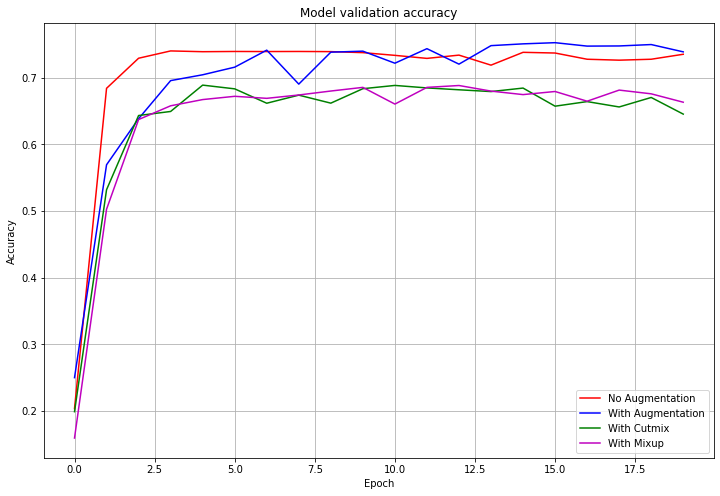

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_resnet50.history['val_accuracy'], 'r')
plt.plot(history_aug_resnet50.history['val_accuracy'], 'b')
plt.plot(history_cutmix_resnet50 .history['val_accuracy'], 'g')
plt.plot(history_mixup_resnet50.history['val_accuracy'], 'm')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation', 'With Cutmix', 'With Mixup'], loc='lower right')
plt.grid(True)
plt.show()

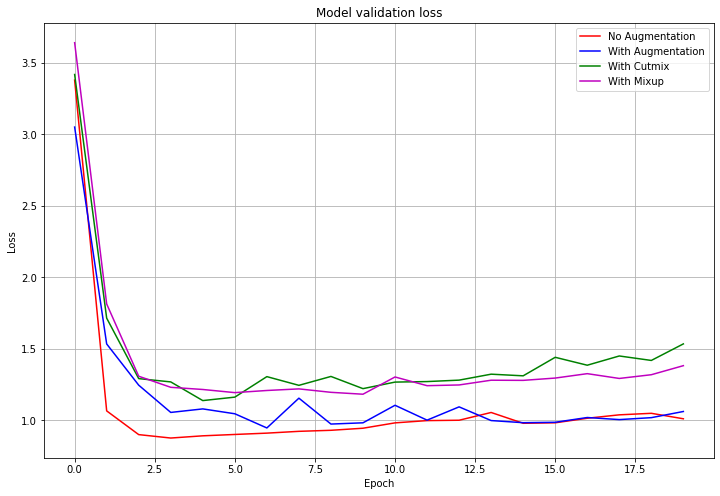

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_resnet50.history['val_loss'], 'r')
plt.plot(history_aug_resnet50.history['val_loss'], 'b')
plt.plot(history_cutmix_resnet50 .history['val_loss'], 'g')
plt.plot(history_mixup_resnet50.history['val_loss'], 'm')
plt.title('Model validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation', 'With Cutmix', 'With Mixup'], loc='upper right')
plt.grid(True)
plt.show()

## part6. AugmentationÏóê ÏùòÌïú Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê

In [ ]:
# import pandas as pd

# accuracy_data = {'resnet50': resnet50.history['val_accuracy'],
               #   'Augmentation': history_aug_resnet50.history['val_accuracy'],
               #   'CutMix': history_cutmix_resnet50 .history['val_accuracy'],
               #   'MixUp': history_mixup_resnet50.history['val_accuracy']   
# }

# accuracy_df = pd.DataFrame(accuracy_data)
# accuracy_df[-5:]

In [ ]:
# accuracy_df.describe()

### trial and error

Ïâ¨Ïö¥ ÌååÌä∏Ïó¨ÏÑú Îπ†Î•¥Í≤å ÎÅùÎÉàÍ≥† ÎπÑÍµêÎèÑ Ïñ¥Î†µÏßÄ ÏïäÏïòÎã§. Ï¥àÎ∞òÏóê Ïª§ÎÑê ÏÑ§Ï†ï ÏûòÎ™ªÌï¥ÏÑú Í∑∏ÎÉ• ÎèåÎ¶¨Îã§Í∞Ä ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ ÏïàÍ∞ÄÏÑú Î≥¥Îãà gpuÎ•º Ïì∞ÏßÄ ÏïäÏïòÎã§Îäî Í±∏ ÏïåÏïÑÏ±ÑÍ≥§ ÏïΩÍ∞Ñ Ï†àÎßùÌñàÏßÄÎßå accÎèÑ lossÎèÑ ÎÑàÎ¨¥ Ïûò ÎÇòÏôÄÏ§òÏÑú ÌûòÏù¥ ÌïòÎÇòÎèÑ ÏïàÎì§ÏóàÎã§. Ïù¥Ï†ú Ïñ¥ÎäêÏ†ïÎèÑ ÏùµÏàôÌï¥ÏßÑ Í≤É Í∞ôÏùÄ CV